# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Raissa Regita Dharmeswari M232D4KX3260]
- **Email:** [m232d4kx3260@bangkit.academy]
- **ID Dicoding:** [raissa_regita_dharmeswari_m232d4kx3260_Ad4]

## Menentukan Pertanyaan Bisnis

- Bagaimana trend dari peminjaman sepeda?
- Apakah jumlah peminjaman sepeda memiliki kaitan dengan musim, cuaca, waktu libur dan waktu kerja?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import seaborn as sns

<ipython-input-2-dc6d1f2e74af>:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/raissadhrmswr/Projek-Analisis-Data/main/datafornotebook.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Berikut penjelasan variable dan value yang terdapat di dataset tersebut.
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

Mengganti tipe data dari dteday karena tipe data dteday adalah object dan ingin mengganti jd datetime64.

In [6]:
convert_dict = {'dteday': 'datetime64[ns]',
                  }
df = df.astype(convert_dict)

Selanjutnya dilakukan data cleaning dengan cara menghapus row yang memiliki value NaN. Caranya adalah
1. mencari berapa banyak NaN pada setiap variable
2. menghapus row yang memiliki value NaN dengan cara .dropna

Setelah itu dilakukan data cleaning dengan menghapus data outlier pada data yang kontinu menggunaka metode IQR.

In [7]:
def outlier(variable):
  Q1 = (df[variable]).quantile(0.25)
  Q3 = (df[variable]).quantile(0.75)
  IQR = Q3 - Q1
  maximum = Q3 + (1.5*IQR)
  minimum = Q1 - (1.5*IQR)
  kondisi_lower_than = df[variable] < minimum
  kondisi_more_than = df[variable] > maximum
  df.drop(df[kondisi_lower_than].index, inplace=True)
  df.drop(df[kondisi_more_than].index, inplace=True)

In [8]:
outlier('temp')
outlier('atemp')
outlier('hum')
outlier('windspeed')
outlier('casual')
outlier('registered')
outlier('cnt')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     676 non-null    int64         
 1   dteday      676 non-null    datetime64[ns]
 2   season      676 non-null    int64         
 3   yr          676 non-null    int64         
 4   mnth        676 non-null    int64         
 5   holiday     676 non-null    int64         
 6   weekday     676 non-null    int64         
 7   workingday  676 non-null    int64         
 8   weathersit  676 non-null    int64         
 9   temp        676 non-null    float64       
 10  atemp       676 non-null    float64       
 11  hum         676 non-null    float64       
 12  windspeed   676 non-null    float64       
 13  casual      676 non-null    int64         
 14  registered  676 non-null    int64         
 15  cnt         676 non-null    int64         
dtypes: datetime64[ns](1), floa

<ipython-input-7-4ddd904fbcfc>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[kondisi_more_than].index, inplace=True)


## Exploratory Data Analysis (EDA)

In [10]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,358.355030,2.505917,0.476331,6.559172,0.026627,2.958580,0.724852,1.405325,0.489558,0.469260,0.633115,0.186731,745.822485,3628.752959,4374.575444
std,212.140732,1.122812,0.499809,3.504206,0.161111,1.933272,0.446919,0.548318,0.184937,0.164443,0.140229,0.072371,531.970237,1576.370496,1862.966924
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,175.750000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.329167,0.326382,0.525059,0.134177,304.750000,2481.750000,3070.250000
50%,349.500000,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.481667,0.470633,0.631250,0.178481,685.000000,3615.500000,4417.000000
75%,545.250000,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.653541,0.607959,0.734583,0.230798,1033.750000,4696.250000,5642.500000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,2301.000000,6946.000000,8173.000000


### Explore ...

In [15]:
df.groupby('weathersit')['cnt'].mean().reset_index().sort_values("cnt")

,weathersit,cnt
2,3,1862.300000
1,2,3917.474359
0,1,4747.104265


In [16]:
df.groupby('holiday')['cnt'].mean().reset_index().sort_values("cnt")

,holiday,cnt
1,1,3274.777778
0,0,4404.661094


In [17]:
df.groupby('season')['cnt'].mean().reset_index().sort_values("cnt")

,season,cnt
0,1,2573.122807
3,4,4629.876471
1,2,4777.858025
2,3,5526.687861


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend dari peminjaman sepeda?
Untuk menggambarkan demand dari peminjaman sepeda, digambarkan dengan line chart.

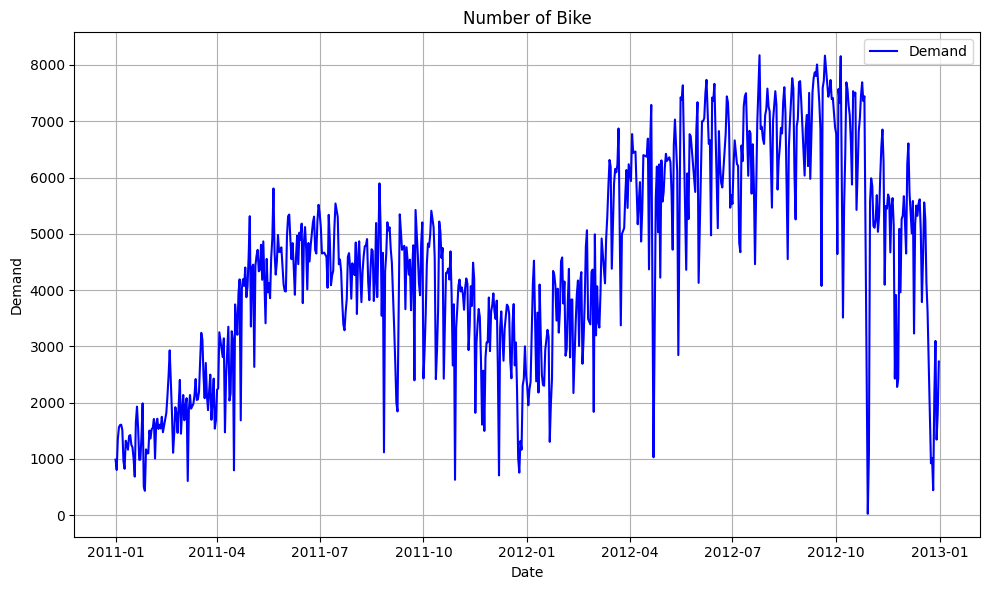

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df['dteday'], df['cnt'], color='b', label='Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Number of Bike')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Grafik diatas lumayan susah untuk dibaca, maka dari itu digunakan resampling agar yang digambarkan merupakan data rata-rata dari perbulannya. Pertama akan menggunakan dteday sebagai indexnya.

In [12]:
demand = df.groupby('dteday')['cnt'].sum().reset_index()
demand = demand.set_index('dteday')
demand.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-21', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=676, freq=None)

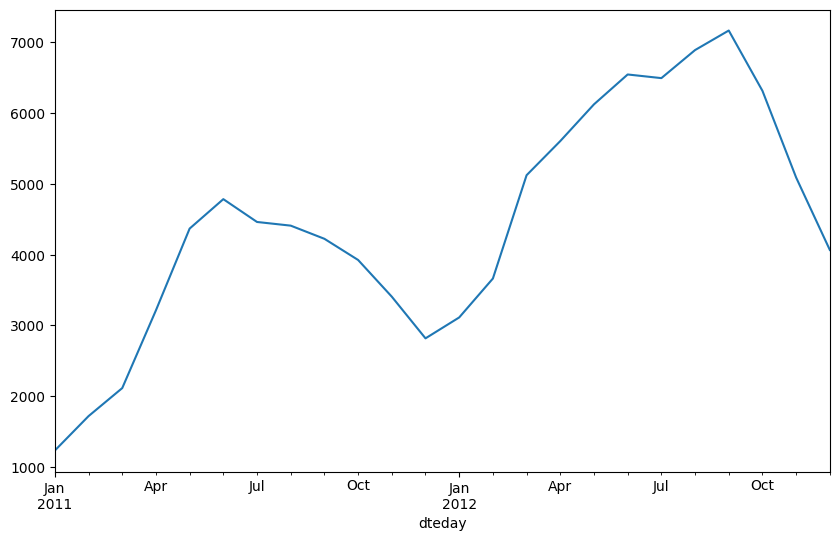

In [13]:
bike = demand['cnt'].resample('MS').mean()
bike.plot(figsize=(10, 6))
plt.show()

### Pertanyaan 2: Apakah jumlah peminjaman sepeda memiliki kaitan dengan musim, cuaca, waktu libur dan waktu kerja?
Berdasarkan grafik jumlah peminjaman sepeda, terdapat bulan-bulan yang menjadi demand peak yang tinggi. Maka dari itu terdapat hipotesis bahwa peminjaman sepeda ada kaitannya dengan musim, cuaca, waktu libur dan waktu kerja. Untuk membukitan itu, diuji hipotesis tersebut dengan pertanyaan **Apakah jumlah peminjaman sepeda memiliki kaitan dengan musim, cuaca, waktu libur dan waktu kerja?**

Untuk menjawab pertanyaan tersebut dilakukan uji kolerasi antara variabel peminjaman sepeda dengan setiap yang ditanyakan. Jika nilai korelasi semakin besar, artinya kaitan antarvariabel semakin kuat. Jika nilai kolerasi minus, maka kaitannya berhubungan terbalik. Untuk penggambaran yang jelas mengenai perhitungan ini, digunakan data visualisasi heatmap.

<ipython-input-14-db15f9c9413d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

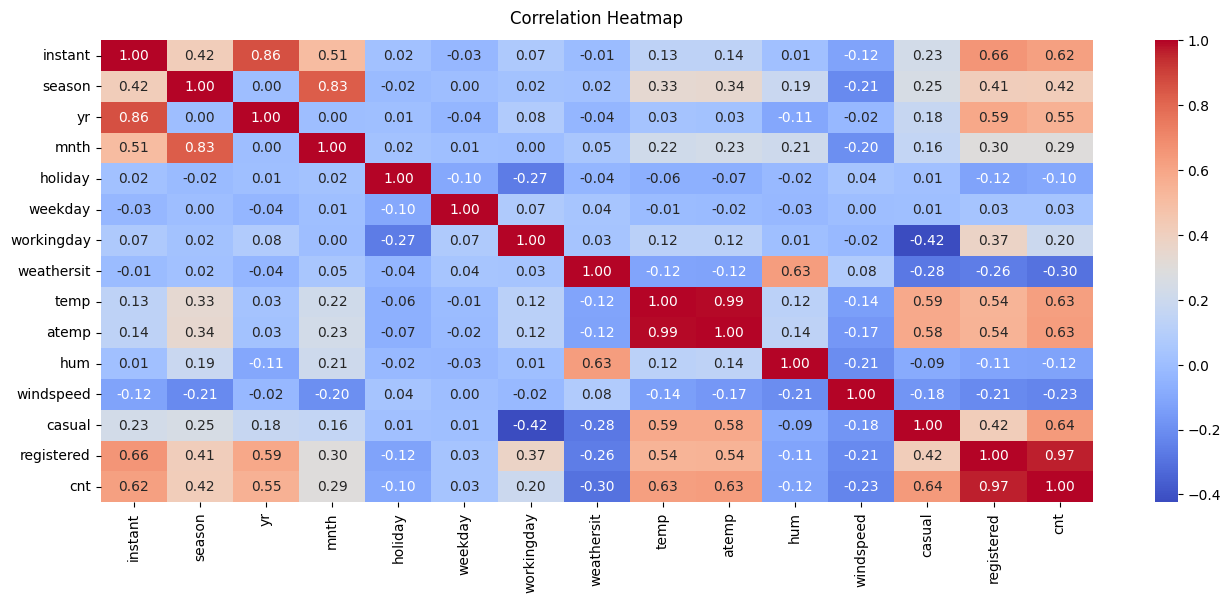

In [14]:
corr = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Conclusion

- Conclution pertanyaan 1: Berdasarkan line chart, terdapat positive trend yaitu grafik bergerak ke atas. Ada beberapa bulan di mana menjadi high season dan beberapa bulan menjadi low season.
- Conclution pertanyaan 2: Jumlah peminjaman sepeda memiliki kaitan yang menengah dengan musim, lemah dengan cuaca, lemah dengan waktu libur, lemah dengan waktu kerja.